# Part 1 - Exploration of Propsper Loan data

## by Michael Smales

## Introduction

* Propsper is a peer-to-peer lending service where borrowers advertize for a loan by creating a listing. Investors can then choose loans to fund based on the borrower profile, loan request etc. 

* This analysis is an investigation of approx. 20k Prosper loans from 2012

* The investigation focuses on loan value, duration, risk rating, APR, and the reason for the loan  

* This workbook is structured into 4 sections:
  - Preliminary Wrangling
  - Univariate Exploration
  - Bivariate Exploration
  - Multivariate Exploration

* Each section is accompanied by a summary

* The main findings are documented in an accompanying presentation

## Preliminary Wrangling

### Gathering & Assessment

Import the data

In [1]:
# import main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
# read in the dataset
df = pd.read_csv("./source_data/prosperLoanData.csv")

**Question:** What is the overall structure of the dataset?

In [3]:
# take an initial look at the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.shape

(113937, 81)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# print the full list of columns
print(list(df.columns))

['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'Deb

**Question:** What is timeframe of dataset?

In [7]:
# check the timeframe of the dataset: listing creation date
df['ListingCreationDate'].min(), df['ListingCreationDate'].max()

('2005-11-09 20:44:28.847000000', '2014-03-10 12:20:53.760000000')

In [8]:
# check the timeframe of the dataset: loan origination date
df['LoanOriginationDate'].min(), df['LoanOriginationDate'].max()

('2005-11-15 00:00:00', '2014-03-12 00:00:00')

**Observation:** Dates Range from 2005 to 2014, and the max and min creation dates and origination dates are closely aligned

Let's select 2012 as our year of interest (avoiding the period around the 2008 financial crisis, where things may be skewed)

### Summary of the dataset structure:

* The dataset contains over 100k loan listings from 2005 to 2014
* Each listing has a primary listing key, and contains foreign keys for the associated member (borrower) and the loan ID
* The data has 81 columns representing data for each listing including:
  - basic information about the listing (create dates etc)
  - the loan including amount, term, status, rate, loan purpose 
  - various risk scores 
  - borrower information such as occupation, state of residence, homeowner status, income range 
  - information from a credit report pull
  - information on the member's (borrower's) prior loans through Prosper 
  - information on payments on the loan associated with the listing
  - number of lenders already invested in the loan

### Main features of interest for this investigation:

* I'm going to focus on exploring the makeup of the loan portfolio, asking questions such as:
  - How large they?
  - What terms lengths do they have?
  - What rates do they have?
  - What are the purposes of the loans?
  - What proportion are funded and to what %

* Out of the full dataset, I'm going to focus on loans from 2012

* Useful features for this:
  - ListingKey
  - ListingCreationDate
  - LoanOriginationDate
  - LoanOriginalAmount
  - MonthlyLoanPayment
  - PercentFunded
  - Term
  - BorrowerAPR
  - ProsperRating (Alpha)
  - ListingCategory

### _Other_ features which will help with the investigation:

It could be interesting to look at which loans get funded vs. those requested.  But first I need to investigate if the dataset is only for funded loans, or if all loans are funded.

So it could be useful to investigate briefly if the dataset is for requested or funded loans, and how we tell.
To explore that, the following fields are useful:
* LoanStatus
* ClosedDate
* LoanKey
* PercentFunded
* Investors

### Cleanup needed before starting with the EDA:
* Create a subset of the dataframe to 2012, with features of interest only
* Rename columns to standard format i.e. lowercase with underscores
* Check for and remove duplicates
* Check for NaNs and either drop or fill them
* Update data types as needed (e.g. convert loan term to categorical)
* Map the numeric loan reason codes to descriptive reason

### Cleaning

### Cut dataset down to 2012, for the features of interest only

In [9]:
# create a copy of the dataset to cut down and clean
df_clean = df.copy()

In [10]:
# reduce dataset to listings created in 2012 only
df_clean = df_clean[(df_clean['LoanOriginationDate'] >= '2012-01-01') & (df_clean['LoanOriginationDate'] < '2013-01-01')]

# confirm this worked
print(df.shape, df_clean.shape)

# confirm this worked #2
print(df_clean['LoanOriginationDate'].min(), df_clean['LoanOriginationDate'].max())

(113937, 81) (19553, 81)
2012-01-03 00:00:00 2012-12-31 00:00:00


In [11]:
# reduce dataset to features of interest only
df_clean = df_clean.loc[:, ['ListingKey', 'ListingCreationDate', 'LoanOriginationDate', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'PercentFunded', 'Term', 'BorrowerAPR', 'ProsperRating (Alpha)', 'ListingCategory (numeric)']]

# confirm this worked
df_clean.shape

(19553, 10)

In [12]:
df_clean.head()

,ListingKey,ListingCreationDate,LoanOriginationDate,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Term,BorrowerAPR,ProsperRating (Alpha),ListingCategory (numeric)
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,2012-11-01 00:00:00,10000,321.45,1.0,36,0.12528,A,16
10,0F123545674891886D9F106,2012-05-10 07:04:01.577000000,2012-05-17 00:00:00,13500,395.37,1.0,60,0.27462,C,1
15,0F483544120452347F48121,2012-04-10 09:14:46.297000000,2012-04-19 00:00:00,4000,173.71,1.0,36,0.35797,HR,13
30,0F57353904771934596FE9F,2012-01-30 17:59:17.200000000,2012-02-07 00:00:00,10000,322.62,1.0,36,0.12782,A,20
31,0F683558129866945165D36,2012-09-21 13:37:43.210000000,2012-09-27 00:00:00,2000,86.85,1.0,36,0.35797,HR,2


### Clean column names

In [13]:
# clean column names
df_clean.rename(columns=lambda x: x.strip().replace(" ", "_").replace("(", "").replace(")", ""), inplace=True)
df_clean.rename(columns=lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower(), inplace=True)
df_clean.rename(columns={'prosper_rating__alpha': 'prosper_rating_alpha', 'borrower_a_p_r': 'borrower_apr'}, inplace=True)
df_clean.columns

Index(['listing_key', 'listing_creation_date', 'loan_origination_date',
       'loan_original_amount', 'monthly_loan_payment', 'percent_funded',
       'term', 'borrower_apr', 'prosper_rating_alpha',
       'listing_category_numeric'],
      dtype='object')

### Check for duplicates

In [14]:
# check for duplicates in the listing key
df_clean['listing_key'].duplicated().sum()

0

### Check for NaN values

In [15]:
# check for total number of NaNs
df_clean.isna().sum()

listing_key                 0
listing_creation_date       0
loan_origination_date       0
loan_original_amount        0
monthly_loan_payment        0
percent_funded              0
term                        0
borrower_apr                0
prosper_rating_alpha        0
listing_category_numeric    0
dtype: int64

**Observation:** We have no NaNs, we can move on

### Convert 'Term' to an ordinal categorical 

In [16]:
df_clean['term'] = pd.Categorical(df_clean['term'], categories=[12, 36, 60], ordered=True)
#confirm it worked
df_clean.dtypes, df_clean['term'].value_counts()

(listing_key                   object
 listing_creation_date         object
 loan_origination_date         object
 loan_original_amount           int64
 monthly_loan_payment         float64
 percent_funded               float64
 term                        category
 borrower_apr                 float64
 prosper_rating_alpha          object
 listing_category_numeric       int64
 dtype: object,
 36    12516
 60     6255
 12      782
 Name: term, dtype: int64)

### Create a column mapping the reason code numbers to descriptions

In [17]:
# Create a new column mapping the reason codes to reasons, using the data description file
reason_map = {
    0 : 'Not Available',
    1 : 'Debt Consolidation', 
    2 : 'Home Improvement', 
    3 : 'Business', 
    4 : 'Personal Loan', 
    5 : 'Student Use', 
    6 : 'Auto', 
    7 : 'Other', 
    8 : 'Baby & Adoption', 
    9 : 'Boat', 
    10 : 'Cosmetic Procedure', 
    11 : 'Engagement Ring', 
    12 : 'Green Loans', 
    13 : 'Household Expenses', 
    14 : 'Large Purchases', 
    15 : 'Medical/Dental', 
    16 : 'Motorcycle', 
    17 : 'RV', 
    18 : 'Taxes', 
    19 : 'Vacation', 
    20 : 'Wedding Loans'
}

# add column to dataframe
df_clean['listing_category_alpha'] = df_clean['listing_category_numeric'].map(reason_map)

In [18]:
# confirm this worked
df_clean.head()

,listing_key,listing_creation_date,loan_origination_date,loan_original_amount,monthly_loan_payment,percent_funded,term,borrower_apr,prosper_rating_alpha,listing_category_numeric,listing_category_alpha
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,2012-11-01 00:00:00,10000,321.45,1.0,36,0.12528,A,16,Motorcycle
10,0F123545674891886D9F106,2012-05-10 07:04:01.577000000,2012-05-17 00:00:00,13500,395.37,1.0,60,0.27462,C,1,Debt Consolidation
15,0F483544120452347F48121,2012-04-10 09:14:46.297000000,2012-04-19 00:00:00,4000,173.71,1.0,36,0.35797,HR,13,Household Expenses
30,0F57353904771934596FE9F,2012-01-30 17:59:17.200000000,2012-02-07 00:00:00,10000,322.62,1.0,36,0.12782,A,20,Wedding Loans
31,0F683558129866945165D36,2012-09-21 13:37:43.210000000,2012-09-27 00:00:00,2000,86.85,1.0,36,0.35797,HR,2,Home Improvement


### Save cleaned dataframe as a csv for future reference

In [19]:
df_clean.to_csv('./source_data/prosperLoanData_clean.csv')

## Univariate Exploration



Before we start with the exploration, define some plotting functions.
NOTE: I've moved these to a separate plot_functions.py for cleanliness and so that I can reuse them in the 'part 2' file

In [20]:
import plot_functions as plt_fns

### Loan amount

**Question:** What is the distribution of loan amounts?

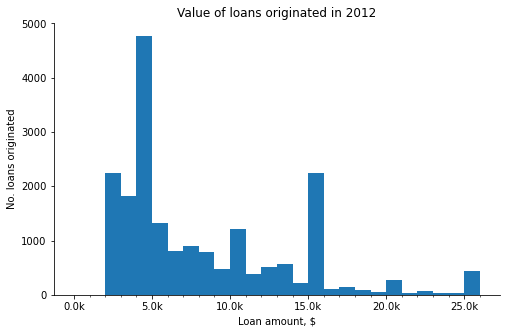

In [21]:
# plot loans originated in 2012
plt_fns.hist_plot(
    chart_data= df_clean['loan_original_amount'],
    xlabel='Loan amount, $',
    ylabel='No. loans originated',
    title='Value of loans originated in 2012',
    bin_step = 1000,
    maj_tick_step = 5000,
    min_tick_step = 1000
)

**Observations:** 
* Values range from \$2-25k with right skew and spikes around \$5k multiples

**Question:** What is going on around the spike at $4-5k?  Is there a single, popular fixed loan amount?

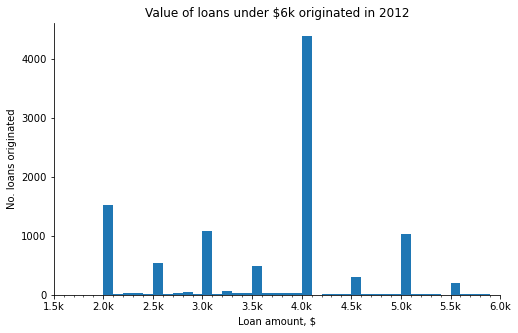

In [22]:
# plot loans under $6k
plt_fns.hist_plot(
    chart_data= df_clean['loan_original_amount'],
    xlabel='Loan amount, $',
    ylabel='No. loans originated',
    title='Value of loans under $6k originated in 2012',
    bin_step = 100,
    maj_tick_step = 500,
    min_tick_step = 100,
    xlim = (1500, 6000)
)

**Observations:** 
* Values under \$6k are clustered around \$500 multiples, with \$4k being the most common value

### Percent funded

**Question:** What % of the original loan amount is typically funded?

In [23]:
# check range of percent_funded
df_clean['percent_funded'].min(), df_clean['percent_funded'].max(),

(0.7009, 1.0125)

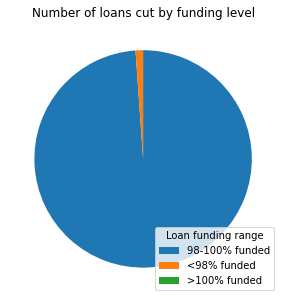

In [24]:
# plot funding level
counts = pd.cut(df_clean['percent_funded'], bins=[0.7, 0.98, 1.0, 1.1]).value_counts();

# set labels; I'm doing this manually because I want to show <95% funded, 95-100% funded and >100% funded
plot_labels = ['98-100% funded', '<98% funded', '>100% funded']

fig, ax = plt.subplots(figsize=[8,5])
patches, text = ax.pie(counts, startangle=90, counterclock=False);
ax.legend(title='Loan funding range', labels=plot_labels, loc='lower right');
ax.set_title('Number of loans cut by funding level');

**Observations:** 
* Close to 100% of the loans in *this dataset* are fully-funded
* It is unclear if *all* Prosper loans are funded or if this is a subset of the funded loans only 

### Loan terms (i.e. loan duration)

**Question:** What is the distribution of loan terms?

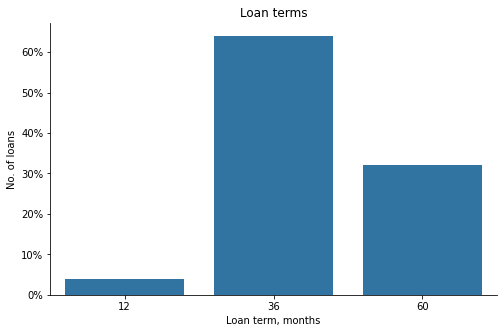

In [25]:
# plot bar chart with relative y axis for loan terms
plt_fns.rel_col_chart(
    chart_data= df_clean['term'], 
    xlabel='Loan term, months', 
    ylabel='No. of loans', 
    title='Loan terms'
)

**Observations:** 
* There are 3 options for loan term, with 36 months the most common

### Reasons people take loans

**Question:** Why do people take Prosper loans?

In [26]:
# Create sort order for the bar chart
lc_order = df_clean['listing_category_alpha'].value_counts().index
# Move 'Other' to the end - it is likely a mixture of miscellaneous categories 
lc_order = lc_order.drop('Other').union(['Other'], sort=False)
lc_order = lc_order.values.tolist()

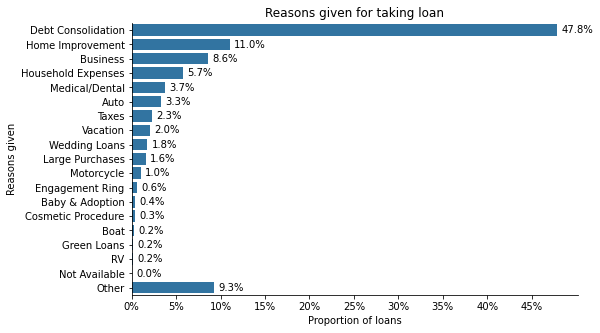

In [27]:
# create plot
plt_fns.rel_bar_chart(
    chart_data= df_clean['listing_category_alpha'], 
    xlabel= 'Proportion of loans', 
    ylabel= 'Reasons given', 
    title= 'Reasons given for taking loan', 
    plot_order=lc_order
)

**Observations:** 
* Debt consolidation accounts for ~50% of loans, followed by home improvement, business, household expenses and 'other'
* These top 5 categories make up 80% of Prospers 2012 loans, by number
* Many categories are barely used, e.g. baby & adoption, cosmetic procedure, boat, green loans, RV 

### Rates on loans & risk ratings

**Question:** What rates do people pay on the loans?

In [28]:
# get info for setting up bin edges
df_clean['borrower_apr'].describe()

count    19553.000000
mean         0.253147
std          0.081855
min          0.065870
25%          0.186370
50%          0.257810
75%          0.335530
max          0.358400
Name: borrower_apr, dtype: float64

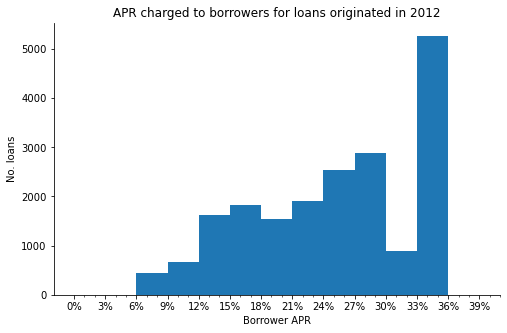

In [29]:
# plot apr charged for loans originated 2012
plt_fns.hist_plot(
    chart_data= df_clean['borrower_apr'],
    xlabel='Borrower APR',
    ylabel='No. loans',
    title='APR charged to borrowers for loans originated in 2012',
    bin_step = 0.03,
    maj_tick_step = 0.03,
    min_tick_step = 0.01
)

plt_fns.tick_format(axis='x', format_type='pct')

\**Observations:** 
* Rates range from  6-36%, with left skew and a concentration of loans at the 36% mark

**Commentary:**
* The maximum rates paid on the loans of ~36% are high.  These rates are corroborated by an online review (linked below) which cites rates from 7.95% to 35.99%
* There is clearly a bias towards customers being charged higher rates
* There are many possible explanations for this.  For example, Prosper may actively push customers to the higher end of their advertised rates to boost profits.  Alternatively, they may find that their customers tend to skew towards higher risk ratings, so only qualify for higher rates 

Review link:
https://www.bankrate.com/loans/personal-loans/reviews/prosper/

**Question:** What is the distribution of risk ratings for the Prosper loans?

In [30]:
# set the risk rating order
rr_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

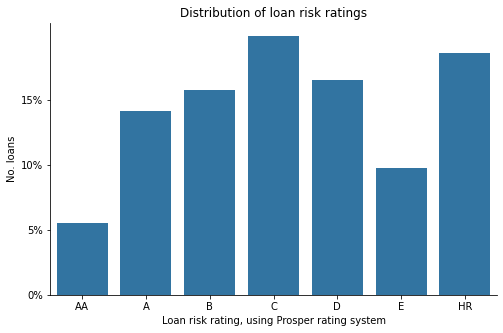

In [31]:
# plot relative bar chart for loan risk rating counts
plt_fns.rel_col_chart(
    chart_data= df_clean['prosper_rating_alpha'], 
    xlabel='Loan risk rating, using Prosper rating system', 
    ylabel='No. loans', 
    title='Distribution of loan risk ratings',
    plot_order = rr_order
)

**Observations**
* Loans are graded from 'AA' to 'high-risk', with C and high-risk the most common
* Surprisingly, this does _not_ match the skew seen in the borrower APRs. Seemingly, loans in the better risk bands are still attracting the higher rates

### Summary of univariate exploration
* Loan values range from \\$2-25k, are right-skewed, and have spikes at multiples of \$5k
* Below \\$5k, loan values tend to cluster around multiples of \$500
* Almost all loans in the dataset are fully-funded
* The most common loan duration is 36 months, followed by 60 months.  12 months is less common
* The reason for almost 50% of loans is debt consolidation.  After that household expenses, business and home improvements and other each get around 10% (by number of loans)
* Borrower APR ranges from 6% to 36%.  There is right skew, with a major peak at 36% APR loans
* Interestingly the risk rating is not as severely right-skewed.  It is bimodal, with peaks at 'C' (the middle of the range) and at 'HR', the high-risk loans


### Major questions I'd like to explore in the bivariate exploration
* What is going on with the cluster of loans with APR of 36%?
* Are there any relationships explaining loan size.  We see the skew favouring loans below $5k.  Is there anything to explain that?
* Are there noticeable differences in the top 5 listing reason groups?  Do they pay more etc?


## Bivariate exploration

Two areas are explored here:
1. APR
2. Loan reasons

### Exploration of APR 


**Question:** What is the relationship between loan amount and APR?

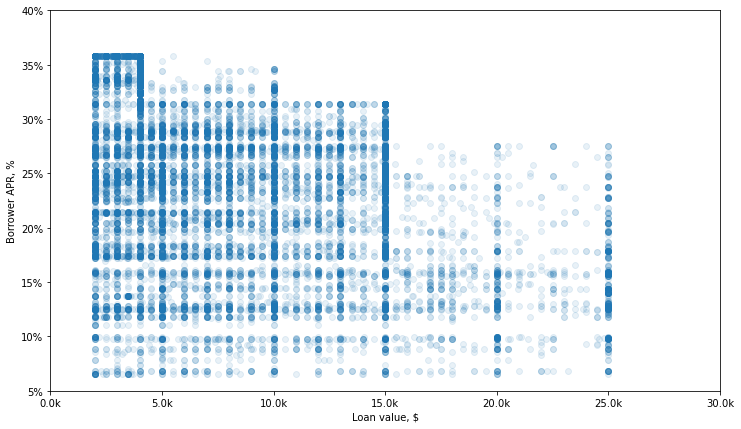

In [32]:
# scatter plot of APR and loan size
fig, ax = plt.subplots(figsize=[12,7])
ax.scatter(x=df_clean['loan_original_amount'], y=df_clean['borrower_apr'], alpha=0.1);
ax.set_xlabel('Loan value, $');
ax.set_ylabel('Borrower APR, %');

#format tick labels
plt_fns.tick_format(axis='x', format_type='k')
plt_fns.tick_format(axis='y', format_type='pct')


**Observations:**
* Track marks are visible at common loan sizes of \$5k multiples - suggesting that loan sizes are capped at certain APRs
* There is a concentration of low-value, high-APR loans in the top-left

**Question:** Can we see a clearer picture of what is happening if we switch to a heatmap? 

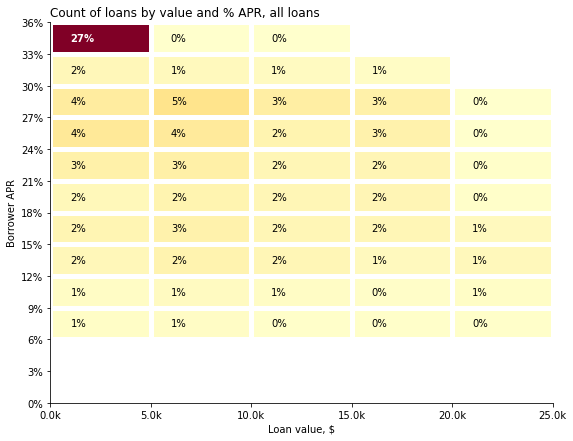

In [33]:
# plot relative count heatmap
plt_fns.count_heatmap_relative(
    data=df_clean,
    xrange = 'loan_original_amount',
    yrange= 'borrower_apr', 
    xlabel= 'Loan value, $', 
    ylabel= 'Borrower APR', 
    title= 'Count of loans by value and % APR, all loans', 
    xbin_step= 5000, 
    ybin_step = 0.03
)


**Observations:**
* 27% of Prospers portfolio is concentration on loans with <\$5k value and 33-36% APR

**Question:** How does APR change with loan risk rating?

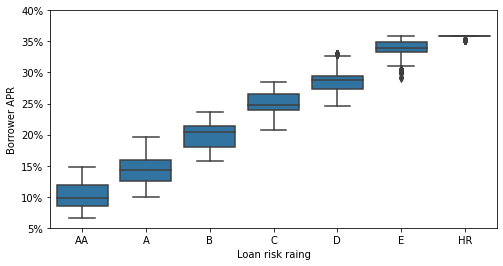

In [34]:
# violin plot / faceted histogram plot of APR distribution for different risk ratings
base_color = sns.color_palette()[0]

# plt.figure(figsize=[8,4])
fig, ax = plt.subplots(figsize=[8,4])
sns.boxplot(data=df_clean, x='prosper_rating_alpha', y='borrower_apr', color=base_color, order=rr_order, ax=ax);
ax.set_ylabel('Borrower APR');
ax.set_xlabel('Loan risk raing');

#format tick labels
plt_fns.tick_format(axis='y', format_type='pct')

**Observations:**
* There is a clear relationship between risk rating and loan rate - as risk rating worsens, APR increases
* Almost all of the high-risk ('HR') loans, and some 'E' loans attract a rate of ~36%

**Question:** Is there a limit on loan value as risk rating increases?

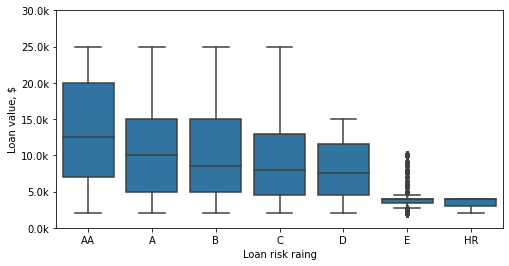

In [35]:
# It looks like loan size is capped at certain APRS (there are no 20k loans with rates over about 24%).  Maybe there are caps on loan size by risk rating?
# violin plot / faceted histogram plot of APR distribution for different risk ratings
base_color = sns.color_palette()[0]

fig, ax = plt.subplots(figsize=[8,4])
sns.boxplot(data=df_clean, x='prosper_rating_alpha', y='loan_original_amount', color=base_color, order=rr_order, ax=ax);
ax.set_ylabel('Loan value, $');
ax.set_xlabel('Loan risk raing');

#format tick labels
plt_fns.tick_format(axis='y', format_type='k')

In [36]:
# confirm max loan value for HR loans
df_clean['loan_original_amount'][df_clean['prosper_rating_alpha']=='HR'].max()

4000

**Observations:**
* As risk rating worsens, loan amounts decrease.  
* At a rating of D the limit appears to  be \$15k, and at HR the limit appears to be \$4k

**Question:** What is the relationship between loan term and rate?

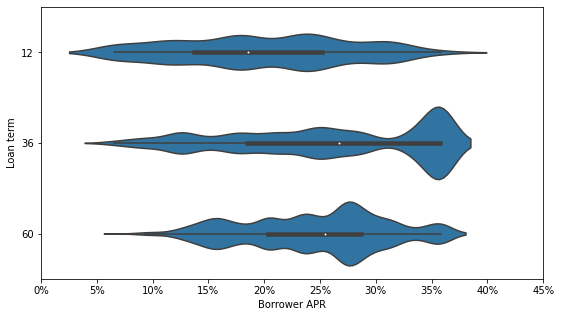

In [37]:
# violin plot / faceted histogram plot of APR distribution for different terms
base_color = sns.color_palette()[0]

fig, ax = plt.subplots(figsize=[9,5])
sns.violinplot(y=df_clean['term'], x=df_clean['borrower_apr'], color=base_color, ax=ax);
ax.set_xlabel('Borrower APR');
ax.set_ylabel('Loan term');

#format tick labels
plt_fns.tick_format(axis='x', format_type='pct')

**Observations:**
* The 36 months loans are bimodal with a large peak at the 36% APR mark
* The 12 month loans tend to have the lowest APRs (contrary to what you would expect)

**Commentary:**
* Tying this all together, Prosper seem to have a large number of high risk customers who are limited to $4k loans at a rate of 36%
* The remainder of their customers who have better risk ratings are able to take out larger loans which attract lower rates.  The rates here seem to be well distributed
* As future work, the customers could be segmented into 'high risk' and 'regular' customers, and we could then look to understand the makeup of Propspers cut along that dimension 

### Exploration of loan reason

**Question:** How does loan value change with loan reason?

In [38]:
# create a subset of the data for the top 5 categories which make up 80% of the loan volume
df_top_5 = df_clean[ \
    (df_clean['listing_category_alpha']=='Debt Consolidation') | \
    (df_clean['listing_category_alpha']=='Home Improvement') | \
    (df_clean['listing_category_alpha']=='Business') | \
    (df_clean['listing_category_alpha']=='Household Expenses') | \
    (df_clean['listing_category_alpha']=='Other') \
]
# confirm this worked
df_top_5['listing_category_alpha'].value_counts()


Debt Consolidation    9352
Home Improvement      2152
Other                 1811
Business              1686
Household Expenses    1123
Name: listing_category_alpha, dtype: int64

In [39]:
# redo listing category order
lc_order = df_top_5['listing_category_alpha'].value_counts().index
# Move 'Other' to the end - it is likely a mixture of miscellaneous categories 
lc_order = lc_order.drop('Other').union(['Other'], sort=False)
lc_order = list(lc_order.values)

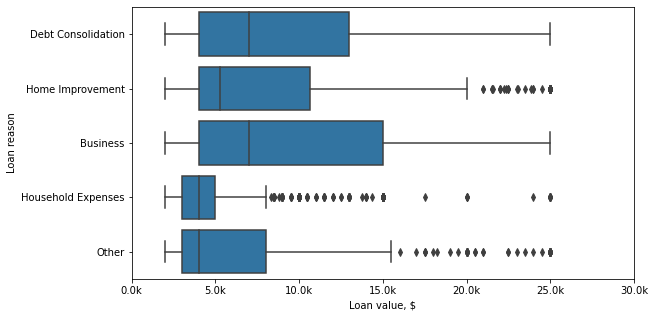

In [40]:

# box plot of Loan value for different terms
base_color = sns.color_palette()[0]

fig, ax = plt.subplots(figsize=[9,5])
sns.boxplot(data=df_top_5, y='listing_category_alpha', x='loan_original_amount', color=base_color, order=lc_order, ax=ax);
ax.set_xlabel('Loan value, $');
ax.set_ylabel('Loan reason');

#format tick labels
plt_fns.tick_format(axis='x', format_type='k')

**Observations:**
* Median values of each category range from $4k to $8k
* The top 3 categories (by volume of loans) have larger ranges and higher median values than the other categories
* As future work it would be interesting to separate the <$5k segment and >$5k segment and see if this picture changes

**Question:** How does APR change across loan category?

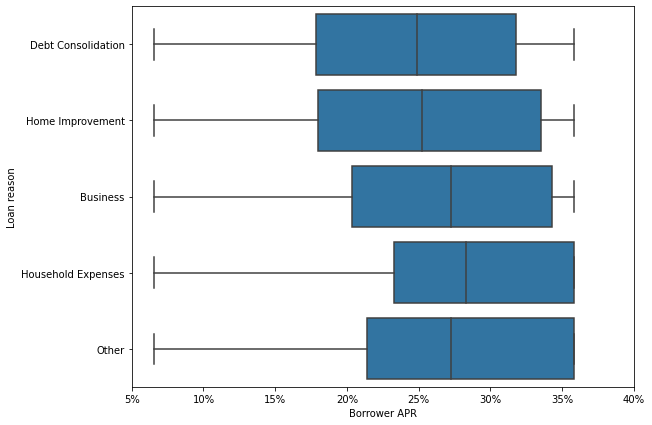

In [41]:
# firstly try a box plot
fig, ax = plt.subplots(figsize=[9,7])
sns.boxplot(data=df_top_5, y='listing_category_alpha', x='borrower_apr', color=base_color, order=lc_order, ax=ax);
ax.set_xlabel('Borrower APR');
ax.set_ylabel('Loan reason');

#format tick labels
plt_fns.tick_format(axis='x', format_type='pct')

**Observations:** 
* Median APRs are fairly consistent between categories, ranging from 25% to 30%
* Household expenses has the highest median and lower quartile APR, implying it is the riskiest category

**Question:** How does the makeup of risk ratings change across loan reason categories?

In [42]:
# prepare the dataframe by creating a crosstab with the two categorical variables
ct_top_5 = pd.crosstab(index=df_top_5['listing_category_alpha'], columns=df_top_5['prosper_rating_alpha'], normalize='index')
#reorder coluns
ct_top_5 = ct_top_5.loc[:, rr_order]
#reorder rows
ct_top_5 = ct_top_5.loc[lc_order, :]
ct_top_5

prosper_rating_alpha,AA,A,B,C,D,E,HR
listing_category_alpha,,,,,,,
Debt Consolidation,0.079555,0.136976,0.173973,0.190547,0.166488,0.092921,0.159538
Home Improvement,0.041822,0.181227,0.138941,0.203996,0.163569,0.087825,0.182621
Business,0.041518,0.135231,0.126335,0.199881,0.188612,0.086595,0.221827
Household Expenses,0.017809,0.090828,0.129118,0.202137,0.171861,0.121104,0.267142
Other,0.023192,0.125345,0.124793,0.221977,0.167311,0.102154,0.235229


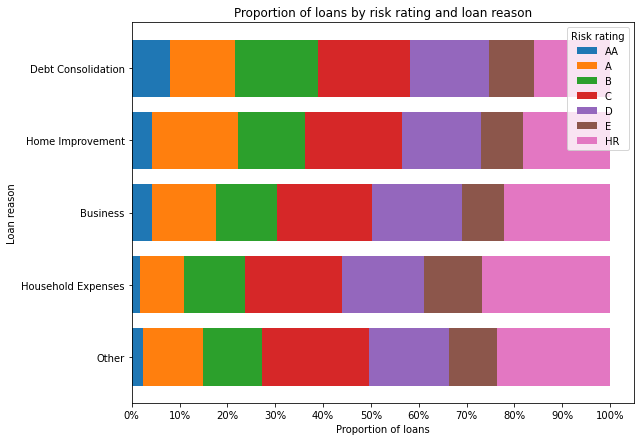

In [43]:

# plot the same but using matplotlib to plot each series one after the other

# set up y-coords
y_coords = np.arange(1, len(ct_top_5)+1, 1)
y_coords

# set up coordinates for the base of each set of bars
lefts = np.zeros(5)

fig, ax = plt.subplots(figsize=[9,7])

#plot each successive series, one on top of the other
for col in ct_top_5:
    ax.barh(y=y_coords, width=list(reversed(ct_top_5[col].values)), left=lefts, label=col);
    lefts = lefts  + list(reversed(ct_top_5[col].values));

#set up xticks
x_tick_props = np.arange(0,1.1,0.1)
x_tick_names = ['{:0.0f}%'.format(v * 100) for v in x_tick_props]

#chart and axis labelling
ax.legend(title='Risk rating');
ax.set_xlabel('Proportion of loans');
ax.set_ylabel('Loan reason');
ax.set_title('Proportion of loans by risk rating and loan reason');

# set axis labels
ax.set_yticks(ticks = y_coords, labels=reversed(ct_top_5.index));
ax.set_xticks(x_tick_props, labels=x_tick_names);


**Observations:** 
* Debt Consolidation and Home Improvement have better risk ratings vs. Business and Household expenses
* This corresponds to the increasing APR and decreasing loan amounts in the latter two categories vs. the first two

### Summary of bivariate exploration

**Investigation of rate**

* There is a high concentration of loans with values of <$5k and rates of 33-36%.  The remainder of loans are more evenly distributed, typically with values from $5-15k, and rates from 15%-30%
* As the loan becomes riskier (i.e. moving from category 'AA' to 'HR') two things happen
    1. The median rate increases from ~10% to ~36%
    2. Median loan value decreases. There appear to be value caps of $15k and $4k kicking in at risk categories 'D' and 'HR' respectively

**Investigation of loan reason**

* 3 categories, debt consolidation (DC), home improvements (HI) and business (B) have higher median loan sizes, lower median borrower rates, and a higher proportion of loans with good risk ratings, when compared to the other (O) and household expense (HE) categories

## Multivariate exploration

**Questions to investigate with multivariate exploration**

The final question I'd like to look at here is the relationship between loan size, APR and risk rating.  From the above, we'd expect to see the cluster of small, high-APR loans are all high risk ('HR')

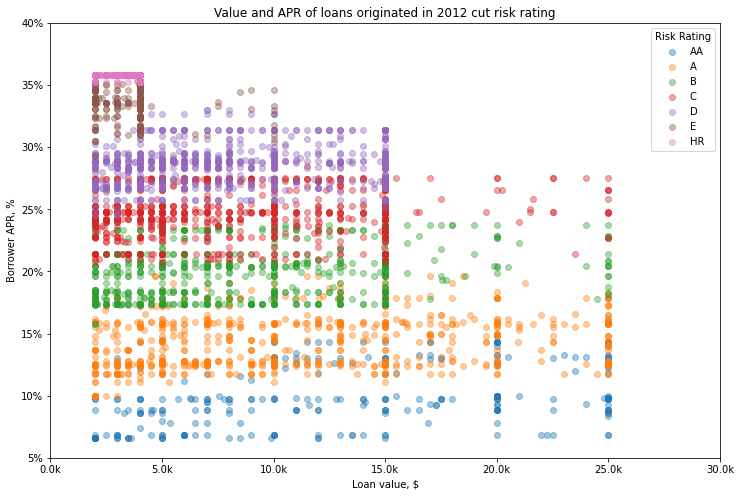

In [44]:
# take a sample of ~25% of the loans
df_sample = df_clean.sample(5000)

# scatter plot of APR and loan size
fig, ax = plt.subplots(figsize=[12,8])

for risk_rating in rr_order:
    ax.scatter(x=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['loan_original_amount'], y=df_sample[df_sample['prosper_rating_alpha']==risk_rating]['borrower_apr'], alpha=0.4, label=risk_rating);


ax.set_xlabel('Loan value, $');
ax.set_ylabel('Borrower APR, %');
ax.set_title('Value and APR of loans originated in 2012 cut risk rating');
ax.legend(title='Risk Rating');

#format tick labels
plt_fns.tick_format(axis='x', format_type='k')
plt_fns.tick_format(axis='y', format_type='pct')


Let's try making this clearer with a faceted plot 

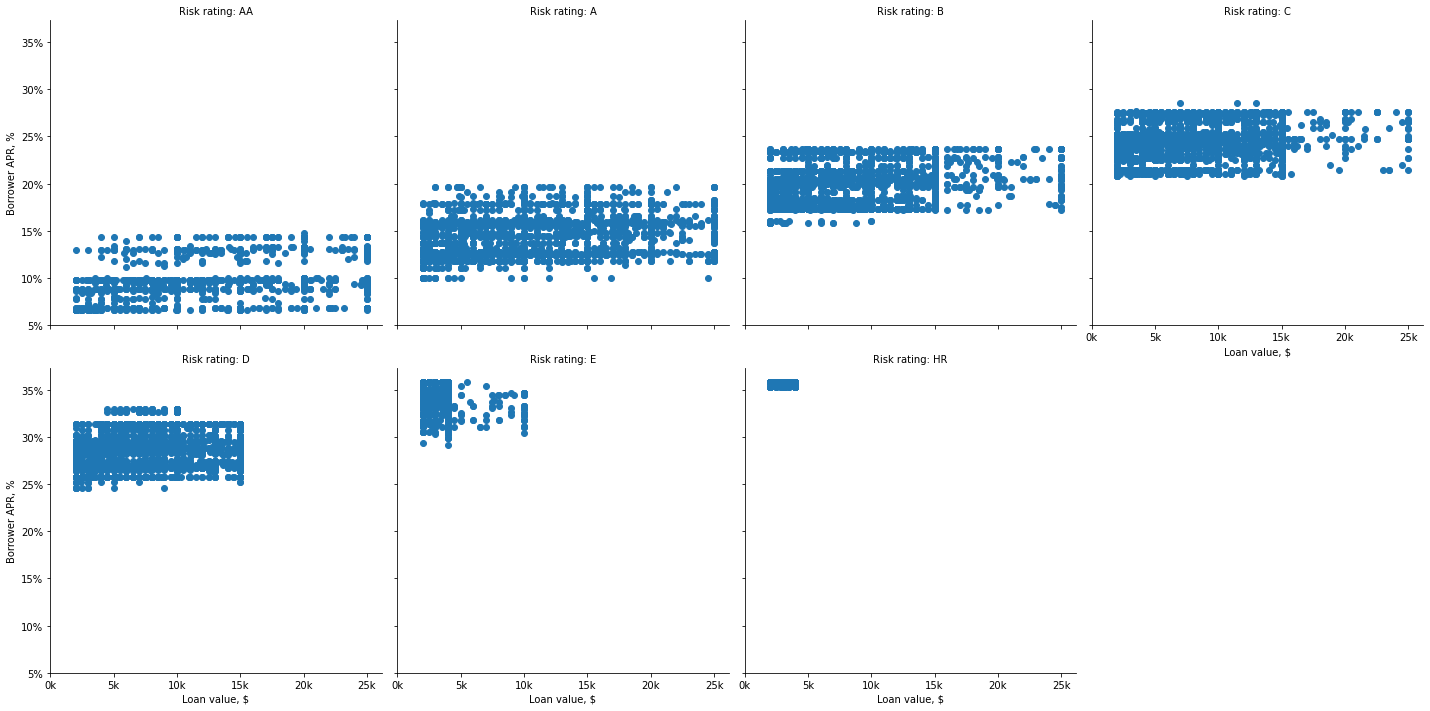

In [45]:
# try plotting this over 5 faceted histograms
g = sns.FacetGrid(data= df_clean, col = 'prosper_rating_alpha', col_order= rr_order, height=5, aspect=1, col_wrap=4, sharex=True, margin_titles=True); 
g.map(plt.scatter, 'loan_original_amount', 'borrower_apr');

# add titles and axis labels
g.set_xlabels('Loan value, $');
g.set_ylabels('Borrower APR, %');
g.set_titles(col_template="Risk rating: {col_name}");

# format x and y ticks
xticks = []
xticklabels = []
yticks = []
yticklabels = []
for i in range(0, 30000, 5000):
    xticks.append(i)
    xticklabels.append('{:.0f}k'.format(i/1000))
for i in range(5, 40, 5):
    yticks.append(i/100)
    yticklabels.append('{:.0f}%'.format(i))

g.set(
    xticks=xticks, 
    xticklabels=xticklabels
);
g.set(
    yticks=yticks, 
    yticklabels=yticklabels
);


**Observations:**
* There is clear banding of the risk rating:
  - As the loan becomes riskier, the APR increases.  Visually there are well-defined limits for the APR for a given risk rating
  - Similarly, as the loan becomes riskier, the max value is capped.  These value caps come in and become more restrictive at each of ratings D, E and HR